<center><h2>Breast-Cancer </center></h2>

In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("breast_cancer.csv")
df.drop("Unnamed: 32",inplace=True,axis=1)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
X = df.iloc[:,2:]
Y = df.iloc[:,1]
Y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [5]:
from keras.utils import to_categorical
y= to_categorical(Y,num_classes=2)


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization


In [8]:
model = Sequential()

model.add(BatchNormalization(input_shape=(30,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Dense(32,activation='relu'))
model.add(Dropout(rate=0.1))

model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 3,290
Trainable params: 3,230
Non-trainable params: 60
___________________________________________________

In [10]:
model.fit(X_train,y_train,epochs=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
512/512 [==============================] - 0s 847us/step - loss: 0.5882 - accuracy: 0.7207
Epoch 2/100
512/512 [==============================] - 0s 74us/step - loss: 0.3617 - accuracy: 0.8926
Epoch 3/100
512/512 [==============================] - 0s 77us/step - loss: 0.2229 - accuracy: 0.9336
Epoch 4/100
512/512 [==============================] - 0s 82us/step - loss: 0.1627 - accuracy: 0.9473
Epoch 5/100
512/512 [==============================] - 0s 83us/step - loss: 0.1232 - accuracy: 0.9531
Epoch 6/100
512/512 [==============================] - 0s 82us/step - loss: 0.1334 - accuracy: 0.9551
Epoch 7/100
512/512 [==============================] - 0s 79us/step - loss: 0.0841 - accuracy: 0.9766
Epoch 8/100
512/512 [==============================] - 0s 80us/step - loss: 0.1087 - accuracy: 0.9609
Epoch 9/100
512/512 [==============================] - 0s 84us/step - loss: 0.0904 - acc

512/512 [==============================] - 0s 69us/step - loss: 0.0318 - accuracy: 0.9863
Epoch 76/100
512/512 [==============================] - 0s 70us/step - loss: 0.0529 - accuracy: 0.9805
Epoch 77/100
512/512 [==============================] - 0s 70us/step - loss: 0.0403 - accuracy: 0.9844
Epoch 78/100
512/512 [==============================] - 0s 71us/step - loss: 0.0345 - accuracy: 0.9785
Epoch 79/100
512/512 [==============================] - 0s 71us/step - loss: 0.0522 - accuracy: 0.9805
Epoch 80/100
512/512 [==============================] - 0s 72us/step - loss: 0.0574 - accuracy: 0.9727
Epoch 81/100
512/512 [==============================] - 0s 68us/step - loss: 0.0236 - accuracy: 0.9922
Epoch 82/100
512/512 [==============================] - 0s 68us/step - loss: 0.0330 - accuracy: 0.9883
Epoch 83/100
512/512 [==============================] - 0s 69us/step - loss: 0.0190 - accuracy: 0.9961
Epoch 84/100
512/512 [==============================] - 0s 68us/step - loss: 0.0175 - 

In [11]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
y_test = y_test.argmax(axis=1)



In [13]:


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)



In [16]:
print("Test accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Test accuracy is 96.49122807017544%


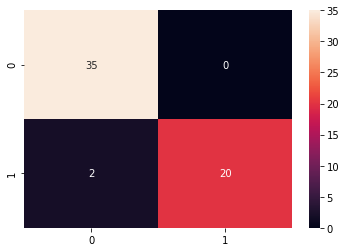

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True)
plt.savefig('h.png')